In [1]:
%matplotlib notebook
from numpy import genfromtxt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
import utils
import numpy as np
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import sys
from operator import itemgetter
from tigramite import data_processing as pp
import time
from tigramite.independence_tests import ParCorr, GPDC, CMIknn, CMIsymb
from tigramite.pcmci import PCMCI
from tigramite import plotting as tp
from data_preparation_utils import load_data, subset, localize, input_na,create_tigramite_dataframe,sensor_family,time_family,weather_family,family_list

R[write to console]: Fehler in loadNamespace(name) : es gibt kein Paket namens ‘RCIT’
Ruft auf: <Anonymous> ... tryCatch -> tryCatchList -> tryCatchOne -> <Anonymous>



Could not import r-package RCIT


In [2]:
path='/Users/rsd8914/Downloads/causalDiscoveryData (1).csv'

In [3]:
my_dataset=load_data(path)

In [19]:
my_subset=subset(data=my_dataset,by_columns=["location","timestamp","lat","lon","dayOfYear", "minuteOfDay", "dayOfWeek", "isWeekend", "temperature",
        "humidity", "p1", "p2", "apparent_temperature", "cloud_cover", "dew_point", "humidity", "precip_intensity", "precip_probability",
        "visibility", "wind_bearing", "wind_gust", "wind_speed","uv_index"],start_date='2017-4-8',end_date='2019-5-8')

In [20]:
my_localized_subset=localize(my_subset,lat=52.517,lon=13.425,results=1)

In [24]:
#pd.set_option('mode.chained_assignment', None)
my_procesed_dataset=input_na(my_localized_subset,columns=["temperature",
        "humidity", "p1", "p2", "apparent_temperature", "cloud_cover", "dew_point", "humidity", "precip_intensity", "precip_probability",
        "visibility", "wind_bearing", "wind_gust", "wind_speed","uv_index"],method='ffill')

my_procesed_dataset=input_na(my_procesed_dataset,columns=["precip_intensity", "precip_probability"],value=0)

my_procesed_dataset.dropna(inplace=True)

In [25]:
dataframe,var_names=create_tigramite_dataframe(my_procesed_dataset,exclude=["location", "lat", "lon","timestamp"])

In [26]:
start = time.time()
parcorr = ParCorr(significance='analytic')
pcmci = PCMCI(
    dataframe=dataframe,
    cond_ind_test=parcorr,
    verbosity=1)

correlations = pcmci.get_lagged_dependencies(tau_max=20)
end = time.time()
print(round(end - start, 2))


## Estimating lagged dependencies
13.49


<IPython.core.display.Javascript object>


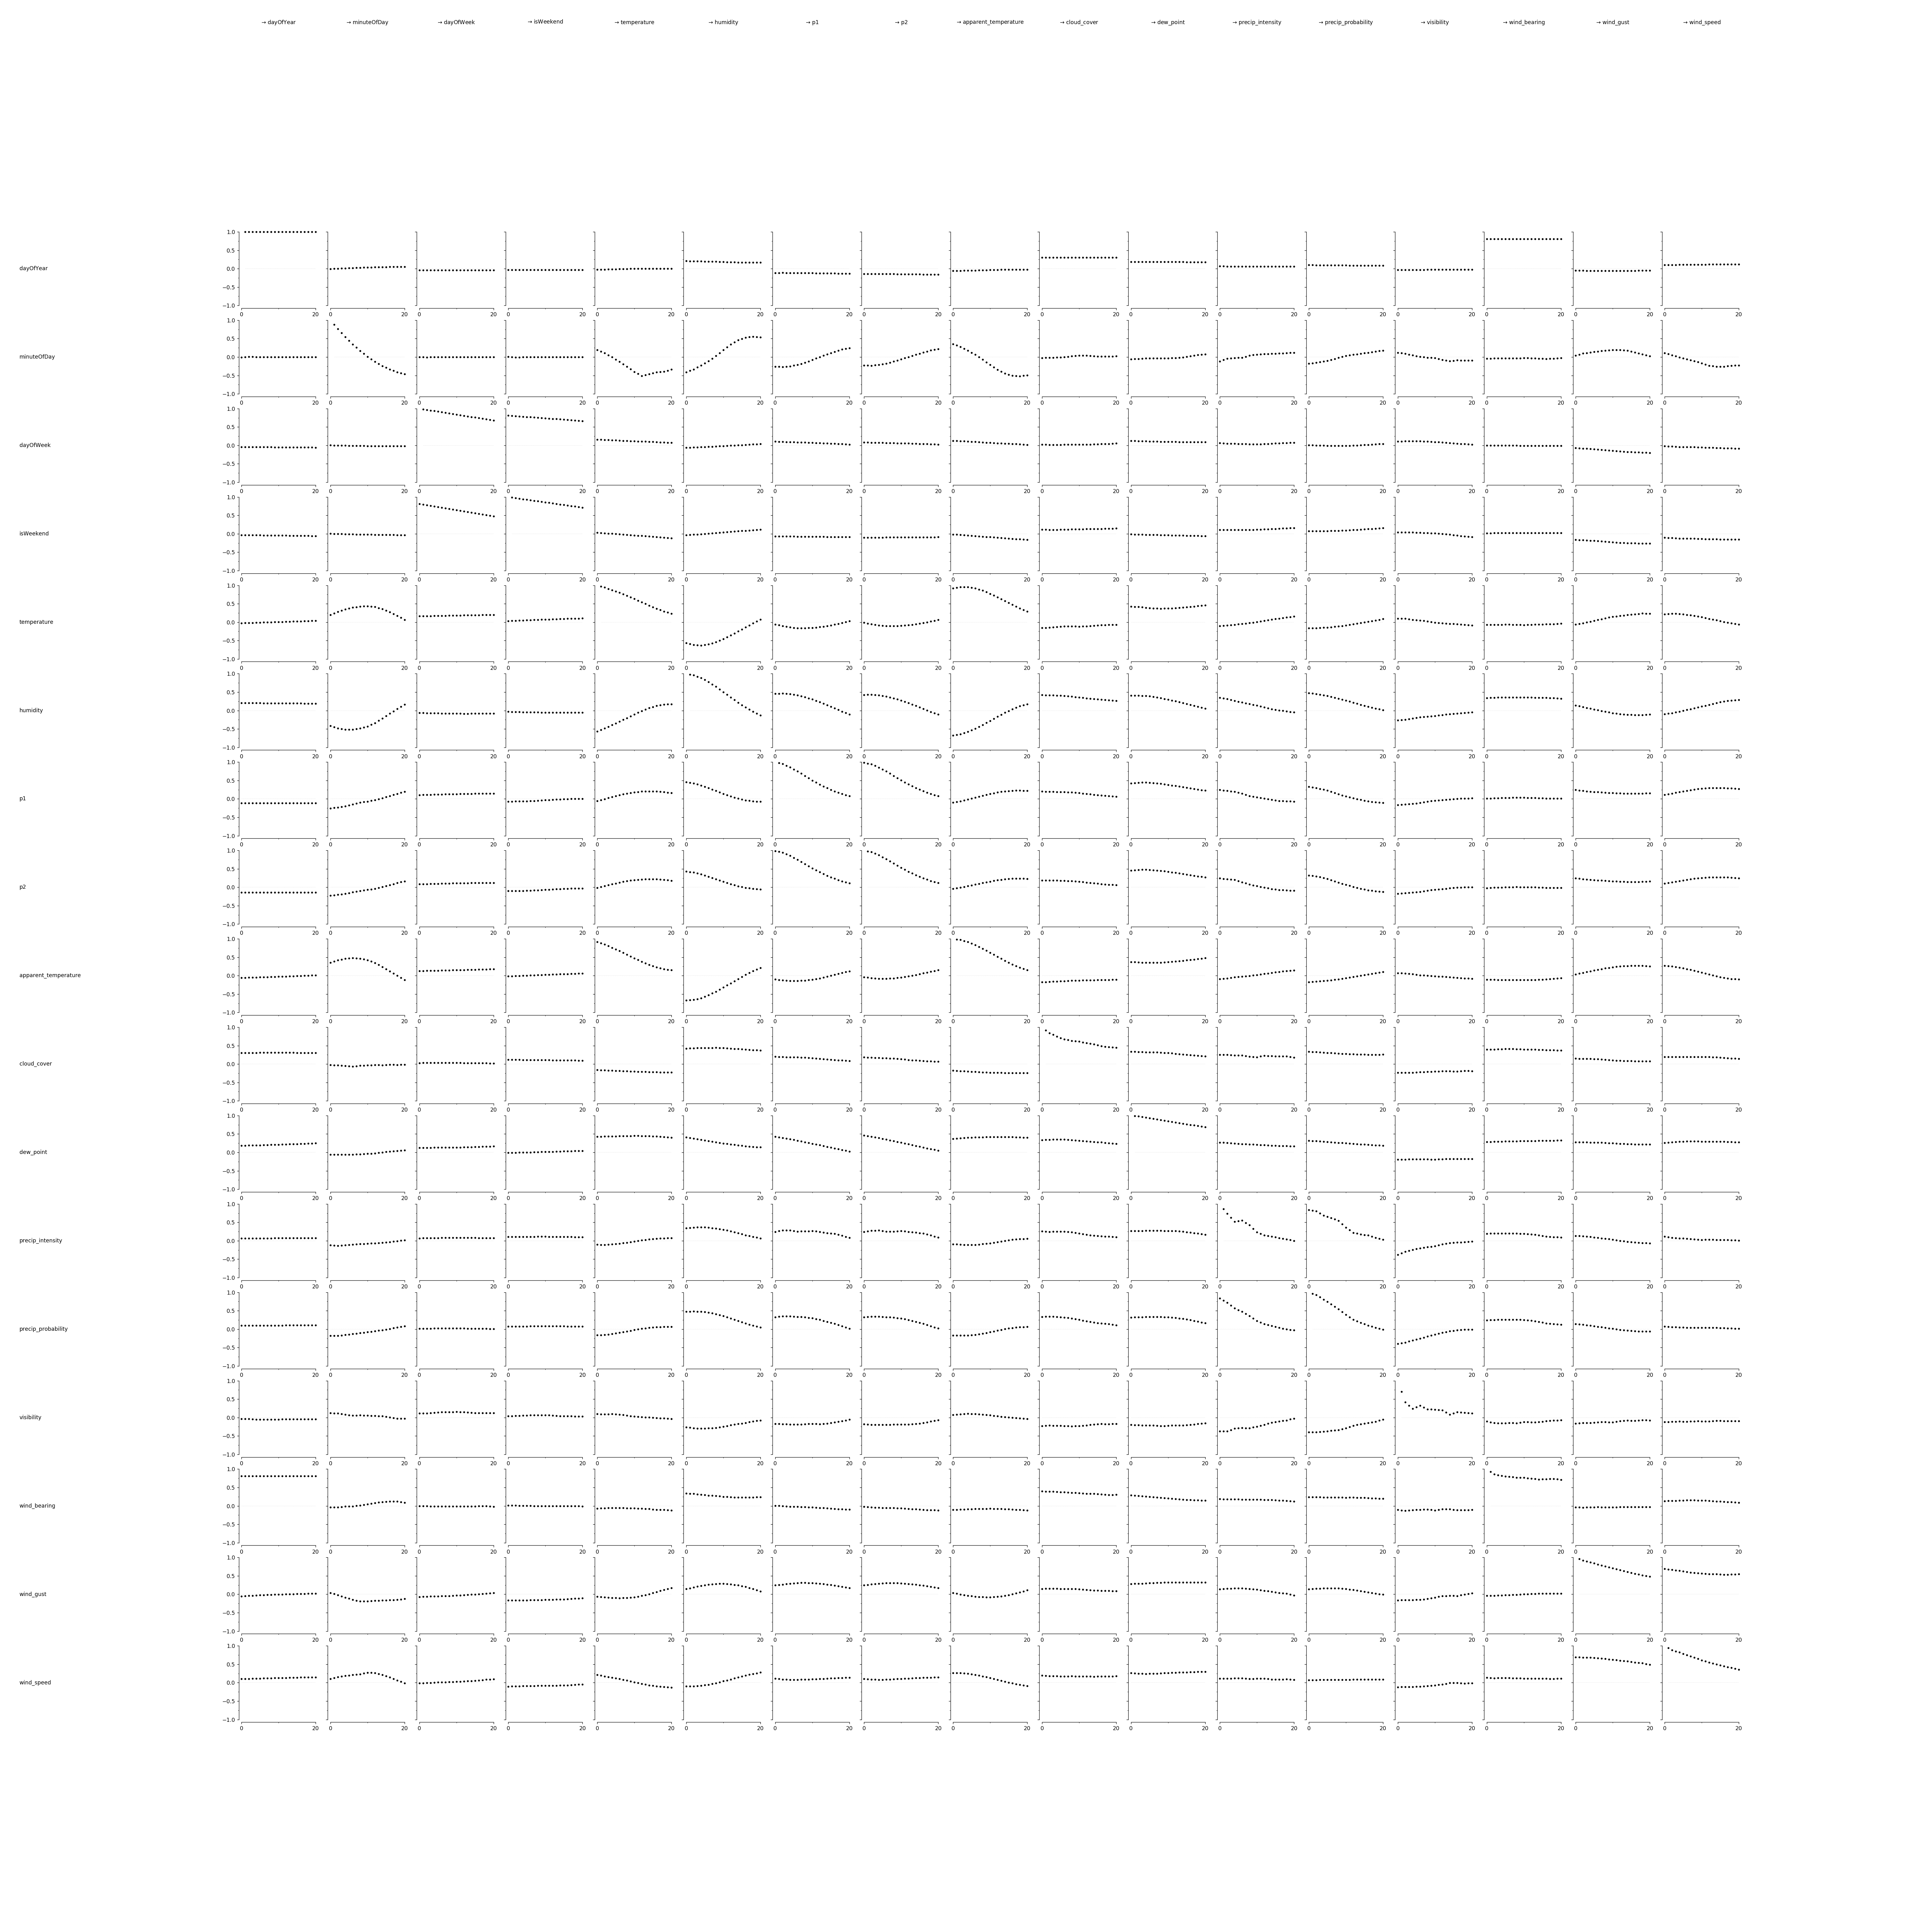

In [9]:
lag_func_matrix = tp.plot_lagfuncs(val_matrix=correlations, setup_args={'var_names':var_names, "figsize":(50,50), "x_base": 20
                                                                    })

In [27]:
pcmci.verbosity = 1
results = pcmci.run_pcmci(tau_max=4, pc_alpha=None)


##
## Running Tigramite PC algorithm
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 4
pc_alpha = None
max_conds_dim = None
max_combinations = 1



## Variable dayOfYear

## Variable minuteOfDay

## Variable dayOfWeek

## Variable isWeekend

## Variable temperature

## Variable humidity

## Variable p1

## Variable p2

## Variable apparent_temperature

## Variable cloud_cover

## Variable dew_point

## Variable precip_intensity

## Variable precip_probability

## Variable visibility

## Variable wind_bearing

## Variable wind_gust

## Variable wind_speed

## Variable uv_index

## Resulting condition sets:

    Variable dayOfYear has 13 parent(s):
    [pc_alpha = 0.5]
        (dayOfYear -1): max_pval = 0.00000, min_val = 0.707
        (p2 -2): max_pval = 0.07758, min_val = 0.010
        (p1 -2): max_pval = 0.14207, min_val = 0.009
        (p2 -3): max_pval = 0.14607, min_val = 0.009
        (p1 -1): max_pval = 0.16485, min_val = 0.008
        (p2 -4): max_pval = 0.32


## Significant links at alpha = 0.05:

    Variable dayOfYear has 33 link(s):
        (dayOfYear -1): pval = 0.00000 | val = 0.671 | conf = (0.000, 0.000)
        (p2 0): pval = 0.00000 | val = 0.392 | conf = (0.000, 0.000)
        (p2 -3): pval = 0.00000 | val = 0.368 | conf = (0.000, 0.000)
        (p1 0): pval = 0.00000 | val = 0.336 | conf = (0.000, 0.000)
        (p2 -2): pval = 0.00000 | val = -0.255 | conf = (0.000, 0.000)
        (dayOfYear -2): pval = 0.00000 | val = 0.211 | conf = (0.000, 0.000)
        (p1 -3): pval = 0.00000 | val = -0.149 | conf = (0.000, 0.000)
        (p1 -2): pval = 0.00000 | val = 0.140 | conf = (0.000, 0.000)
        (dayOfYear -3): pval = 0.00000 | val = -0.108 | conf = (0.000, 0.000)
        (humidity 0): pval = 0.00000 | val = 0.102 | conf = (0.000, 0.000)
        (humidity -2): pval = 0.00000 | val = 0.075 | conf = (0.000, 0.000)
        (dew_point 0): pval = 0.00000 | val = 0.074 | conf = (0.000, 0.000)
        (visibility -2): pval = 0.00000 | 

In [28]:
q_matrix = pcmci.get_corrected_pvalues(p_matrix=results['p_matrix'], fdr_method='fdr_bh')
pcmci.print_significant_links(
        p_matrix = results['p_matrix'], 
        q_matrix = q_matrix,
        val_matrix = results['val_matrix'],
        alpha_level = 0.01)


## Significant links at alpha = 0.01:

    Variable dayOfYear has 29 link(s):
        (dayOfYear -1): pval = 0.00000 | qval = 0.00000 | val = 0.671
        (p2 0): pval = 0.00000 | qval = 0.00000 | val = 0.392
        (p2 -3): pval = 0.00000 | qval = 0.00000 | val = 0.368
        (p1 0): pval = 0.00000 | qval = 0.00000 | val = 0.336
        (p2 -2): pval = 0.00000 | qval = 0.00000 | val = -0.255
        (dayOfYear -2): pval = 0.00000 | qval = 0.00000 | val = 0.211
        (p1 -3): pval = 0.00000 | qval = 0.00000 | val = -0.149
        (p1 -2): pval = 0.00000 | qval = 0.00000 | val = 0.140
        (dayOfYear -3): pval = 0.00000 | qval = 0.00000 | val = -0.108
        (humidity 0): pval = 0.00000 | qval = 0.00000 | val = 0.102
        (humidity -2): pval = 0.00000 | qval = 0.00000 | val = 0.075
        (dew_point 0): pval = 0.00000 | qval = 0.00000 | val = 0.074
        (visibility -2): pval = 0.00000 | qval = 0.00000 | val = -0.052
        (precip_intensity 0): pval = 0.00000 | qval = 

In [29]:
link_matrix = pcmci.return_significant_parents(pq_matrix=q_matrix,
                        val_matrix=results['val_matrix'], alpha_level=0.01)['link_matrix']

<IPython.core.display.Javascript object>


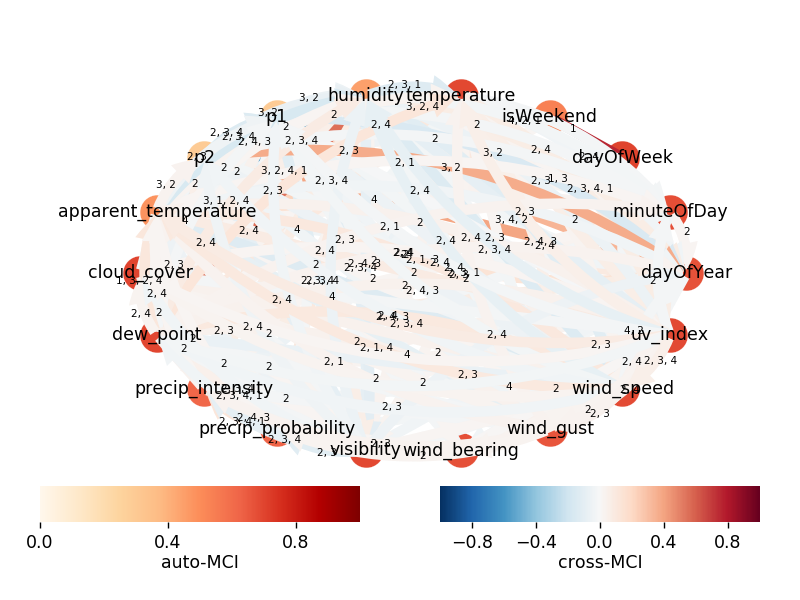

(<Figure size 640x480 with 3 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11beba5f8>)

In [30]:
tp.plot_graph(
    val_matrix=results['val_matrix'],
    link_matrix=link_matrix,
    var_names=var_names,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    )

<IPython.core.display.Javascript object>


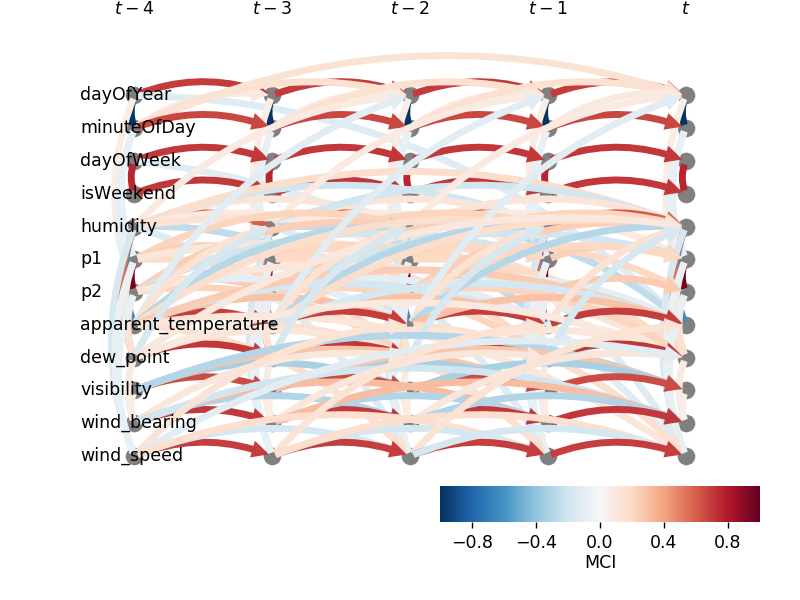

In [18]:
# Plot time series graph
tp.plot_time_series_graph(
    val_matrix=results['val_matrix'],
    link_matrix=link_matrix,
    var_names=var_names,
    link_colorbar_label='MCI',
    )